<a href="https://colab.research.google.com/github/Iyola-Dsilva/ML_implementations/blob/main/FashionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion-Neural Network using TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fd=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fd.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
train_images.shape
type(train_images)

numpy.ndarray

In [8]:
test_images.shape
type(train_labels)

numpy.ndarray

In [13]:
fd_class=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [20]:
fd_class[train_labels[0]]

'Ankle boot'

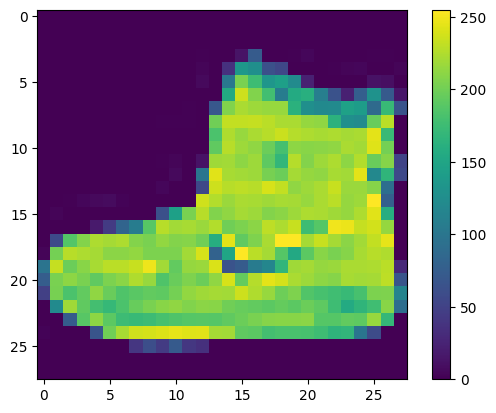

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [23]:
#data prep

train_images=train_images/255.0
test_images=test_images/255.0

In [94]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),    #input layer
                        keras.layers.Dense(196,activation="relu"),    #hidden layer 1
                        keras.layers.Dense(10,activation="softmax") ])  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [110]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8795 - loss: 0.3373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8801 - loss: 0.3357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8865 - loss: 0.3237
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8808 - loss: 0.3320
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8833 - loss: 0.3288


In [112]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

print('Test accuracy:', test_acc*100)

Test accuracy: 86.34999990463257


In [102]:
predictions=model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [85]:
print(predictions[34]) #prediction for test image 34
print(np.argmax(predictions[34]))
print(fd_class[np.argmax(predictions[34])])

[1.3832469e-04 1.1191296e-07 2.1416475e-03 2.9435259e-04 6.7263120e-04
 1.2466460e-03 3.3698871e-04 4.4282151e-09 9.9516922e-01 2.2338768e-10]
8
Bag


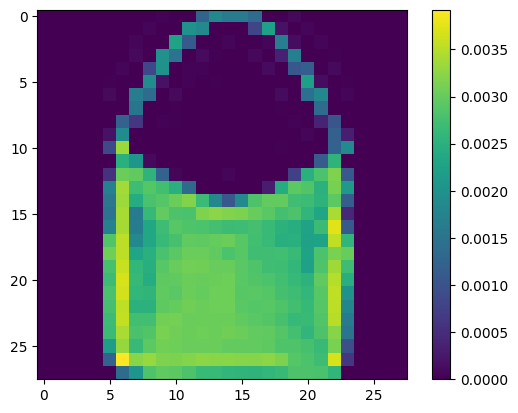

In [86]:
plt.figure()
plt.imshow(test_images[34]) #test image 34
plt.colorbar()
plt.show()